# Repairing structures along an Ensemble

By repairing a structure:

- All incomplete sidechains will be completed.
- Residues with high energy will be self-mutated to try rotamers that minimize the energy.

To repair en ensemble of structures is as simple as call the *repair()* method. The *inPlace* parameter determines if the original ensemble will be overwritten with the repaired structures or a new ensemble will be created. By passing a list of residues in FoldX format to the *fixResidues* parameter these residues will not be taken into account for repair.

In [1]:
# This simulates the installation the user will just import pyFoldx.Ensemble
import sys
sys.path.append("/home/lradusky/Dropbox/workspacesbg/pyFoldX")

In [2]:
from pyfoldx.structure import UniprotEnsemble

In [3]:
#Some other imports, to work with the data and to plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We want to print full tables
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)

We will create a *UniprotEnsemble* object with high quality structures of the HRAS gene.

In [4]:
working_path = "/home/lradusky/Downloads/P01112/ensemble.pdb"
t = UniprotEnsemble("P01112", working_path, just_xray=True, max_resolution=1.3)

Master Structure is 2CE2:
Aligning to master (total: 10)
100%|██████████| 9/9 [00:10<00:00,  1.11s/it]
Ensemble built
Total structures aligned: 5


Let's observe the energies of the loaded structures.

In [5]:
t.getTotalEnergy()

Computing total energy for ensemble...
  0%|          | 0/5 [00:00<?, ?it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [00:02<00:00,  1.85it/s]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2EVW_X,93.703952,-111.073846,-29.491851,-192.182071,-12.148993,279.608121,-247.676069,43.629693,103.598362,252.946217,0.0,0.0,0.0,13.378801,113.104381,-0.735286,0.0,0.0,0.0,-6.709667,0.560541,0.0
2CLC_X,93.476385,-109.464290,-30.688286,-200.418538,-18.048631,311.141307,-254.704771,45.446318,103.440693,254.939831,0.0,0.0,0.0,7.575724,115.269496,-5.681022,0.0,0.0,0.0,-10.639250,0.577299,0.0
2CL7_X,86.292745,-111.538911,-27.169249,-200.011466,-18.159637,308.325486,-254.709544,40.685399,103.711419,253.428963,0.0,0.0,0.0,6.585408,116.932302,-5.474804,0.0,0.0,0.0,-9.963020,0.582701,0.0
2CL6_A,69.931387,-113.591534,-31.942092,-192.620295,-12.501736,274.638717,-249.594714,38.263628,104.513632,249.041162,0.0,0.0,0.0,7.898396,109.828497,-1.505435,0.0,0.0,0.0,-3.419710,0.751368,0.0
2CLD_A,77.114036,-115.311923,-26.408190,-198.777268,-17.557395,297.677110,-253.871793,31.511867,103.896112,244.929615,0.0,0.0,0.0,18.506635,109.893867,-6.335413,0.0,0.0,0.0,-1.675131,0.529810,0.0


Now, let's repair all the structures within the ensemble and save it to a file. 

In [6]:
t.repair()
t.saveToPDB(working_path+"repaired.pdb")

Repairing structures along ensemble...
  0%|          | 0/5 [00:00<?, ?it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [13:48<00:00, 165.73s/it]
Structures repaired.


And we can check that the energy of the structures was minimized.

In [7]:
t.getTotalEnergy()

Computing total energy for ensemble...
100%|██████████| 5/5 [00:02<00:00,  2.06it/s]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2EVW_X,-0.827638,-124.566575,-62.851921,-190.094845,-13.564645,266.531003,-247.756823,10.976832,113.061289,252.702583,0.0,0.0,0.0,3.435189,113.294644,-3.106125,0.0,0.0,0.0,-6.417249,0.823648,0.0
2CLC_X,12.411879,-120.661980,-57.489912,-200.295610,-20.218037,299.166200,-258.292186,15.542145,114.427633,254.124038,0.0,0.0,0.0,3.228374,114.896776,-7.280528,0.0,0.0,0.0,-10.801287,0.963029,0.0
2CL7_X,13.714050,-124.052563,-49.584310,-199.377529,-19.843947,297.633695,-257.245278,14.834830,111.303658,254.564041,0.0,0.0,0.0,3.449865,115.589051,-8.106417,0.0,0.0,0.0,-10.464250,0.602255,0.0
2CL6_A,-9.912858,-124.106959,-64.988106,-195.965254,-15.454159,272.575160,-256.583301,9.198078,117.514158,248.154759,0.0,0.0,0.0,4.115418,110.090365,-1.846323,0.0,0.0,0.0,-3.346689,0.820360,0.0
2CLD_A,0.224361,-131.138877,-56.868578,-199.535943,-18.244543,288.124936,-256.940621,11.303503,115.391178,246.914890,0.0,0.0,0.0,10.137852,110.235380,-7.979886,0.0,0.0,0.0,-1.518440,0.578890,0.0


Computing residue energy for ensemble...
  0%|          | 0/5 [00:00<?, ?it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
Energy computed.


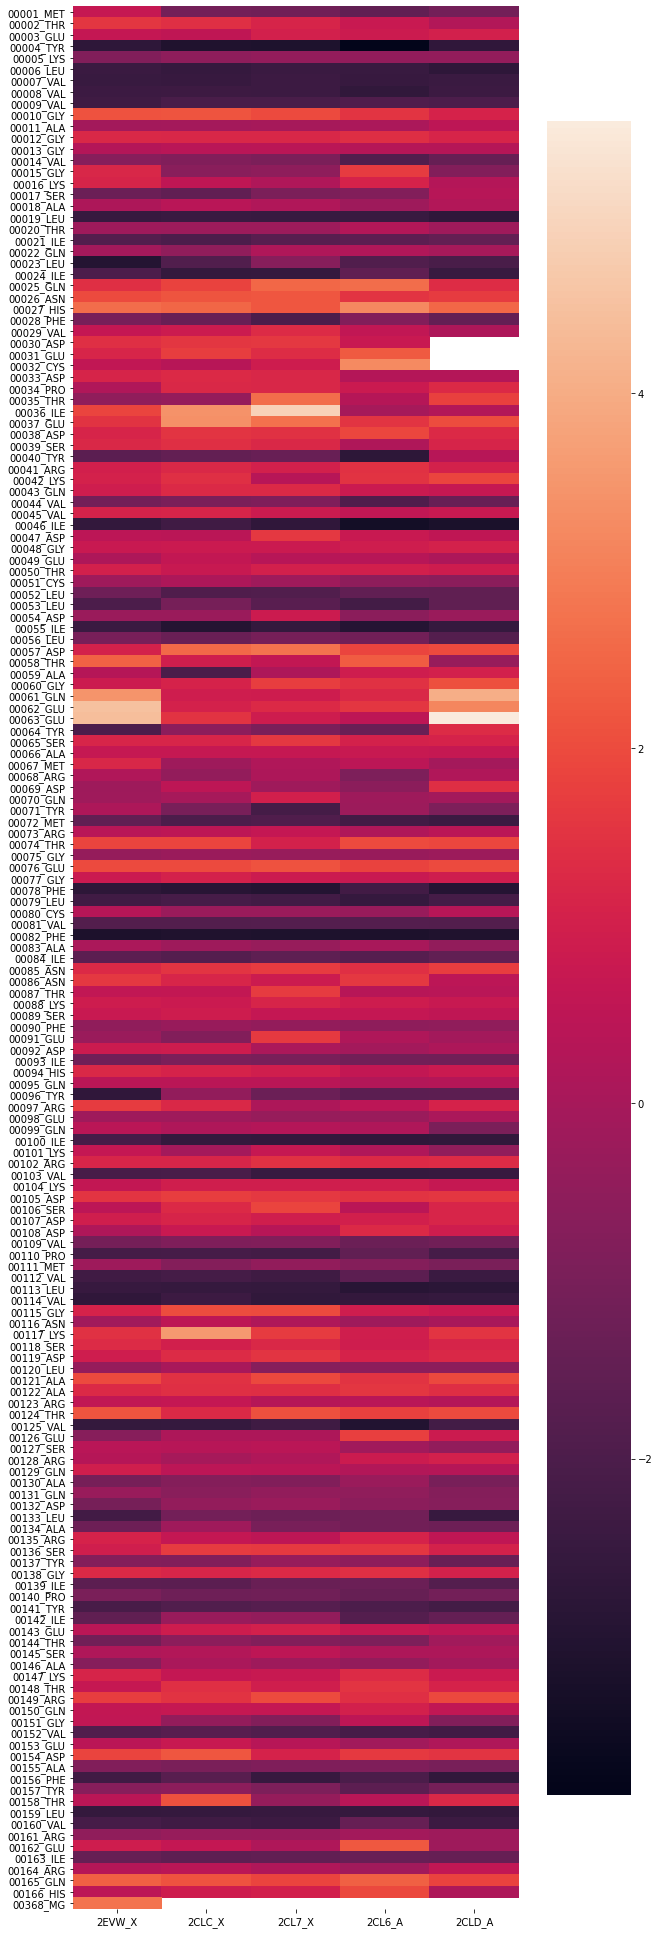

In [8]:
plt.figure(figsize=(10,35))
sns.heatmap(t.getResiduesEnergy())